In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('../')

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Transfer success and Zest correlation

Here we will take a look at transfer rate of adversarial examples computed on different models,
and we will examine if there is a correlation with the Zest distance between the
respective models.

In [27]:
res_32 = 'results/distances_32_all_densenet121_densenet161_densenet169_googlenet_inception_v3_mobilenet_v2_resnet18_resnet34_resnet50_vgg11_bn_vgg13_bn_vgg16_bn_vgg19_bn.npy'
res_64 = 'results/distances_64_all_densenet121_densenet161_densenet169_googlenet_inception_v3_mobilenet_v2_resnet18_resnet34_resnet50_vgg11_bn_vgg13_bn_vgg16_bn_vgg19_bn.npy'
res_128 = 'results/distances_128_all_densenet121_densenet161_densenet169_googlenet_inception_v3_mobilenet_v2_resnet18_resnet34_resnet50_vgg11_bn_vgg13_bn_vgg16_bn_vgg19_bn.npy'

all_res = [res_32, res_64, res_128]
res_N = [32, 64, 128]
N = 128

transfer_res_file = 'results/transfer_densenet121_densenet161_densenet169_googlenet_inception_v3_mobilenet_v2_resnet18_resnet34_resnet50_vgg11_bn_vgg13_bn_vgg16_bn_vgg19_bn.npy'
dataset = 'CIFAR10'
all_proxies = [
    'vgg11_bn',
    'vgg13_bn',
    'vgg16_bn',
    'vgg19_bn',
    'resnet18',
    'resnet34',
    'resnet50',
    'densenet121',
    'densenet161',
    'densenet169',
    'mobilenet_v2',
    'googlenet',
    'inception_v3'
]
all_proxies = sorted(all_proxies)

# metric = 'Cosine'
metric = 'L-inf'
metrics = ['Cosine', 'L-inf']

## Zest distances

In [5]:
def inn_inf(v):
    return {i: j[2] for i,j in v.items()}
def inn_cos(v):
    return {i: j[3] for i,j in v.items()}

In [6]:
distance_dfs = {}
for cur_res in all_res:
    all_dist = np.load(cur_res, allow_pickle=True).item()

    all_dist_inf = {k: inn_inf(v) for k, v in all_dist.items()}
    all_dist_cos = {k: inn_cos(v) for k, v in all_dist.items()}
    
    all_inf_df = pd.DataFrame.from_dict(all_dist_inf)
    all_cos_df = pd.DataFrame.from_dict(all_dist_cos)
    all_inf_df = all_inf_df.sort_index()
    all_cos_df = all_cos_df.sort_index()

    both_df = pd.concat([all_inf_df, all_cos_df], keys=["L-inf", "Cosine"])
    
    distance_dfs[int(cur_res.split('_')[1])] = both_df

## Transfer rates

In [7]:
transfer_res = np.load(transfer_res_file, allow_pickle=True).item()

In [8]:
heatmap_df = []
for victim, results in transfer_res.items():
    victim_dict = {'Victim': victim,}
    victim_dict.update(results['successes'])
    heatmap_df.append(victim_dict)

In [9]:
heatmap_df = pd.DataFrame.from_dict(heatmap_df)
display(heatmap_df)

,Victim,densenet121,densenet161,densenet169,googlenet,inception_v3,mobilenet_v2,resnet18,resnet34,resnet50,vgg11_bn,vgg13_bn,vgg16_bn,vgg19_bn
0,densenet121,1.00,0.52,0.42,0.06,0.05,0.17,0.32,0.35,0.36,0.24,0.13,0.07,0.07
1,densenet161,0.36,0.97,0.47,0.07,0.05,0.18,0.30,0.34,0.37,0.22,0.12,0.07,0.05
2,densenet169,0.40,0.56,1.00,0.09,0.05,0.17,0.31,0.35,0.38,0.23,0.17,0.08,0.09
3,googlenet,0.34,0.36,0.32,1.00,0.30,0.62,0.30,0.36,0.37,0.36,0.38,0.33,0.25
4,inception_v3,0.33,0.35,0.32,0.30,0.94,0.68,0.25,0.30,0.29,0.29,0.35,0.22,0.25
5,mobilenet_v2,0.38,0.40,0.38,0.47,0.32,1.00,0.44,0.50,0.46,0.47,0.48,0.34,0.29
6,resnet18,0.26,0.32,0.29,0.07,0.04,0.13,1.00,0.45,0.30,0.31,0.17,0.11,0.07
7,resnet34,0.28,0.31,0.29,0.07,0.02,0.13,0.42,1.00,0.30,0.36,0.09,0.06,0.07
8,resnet50,0.33,0.42,0.38,0.06,0.04,0.19,0.32,0.42,1.00,0.29,0.16,0.08,0.06
9,vgg11_bn,0.10,0.04,0.07,0.03,0.02,0.07,0.16,0.12,0.09,1.00,0.06,0.05,0.02


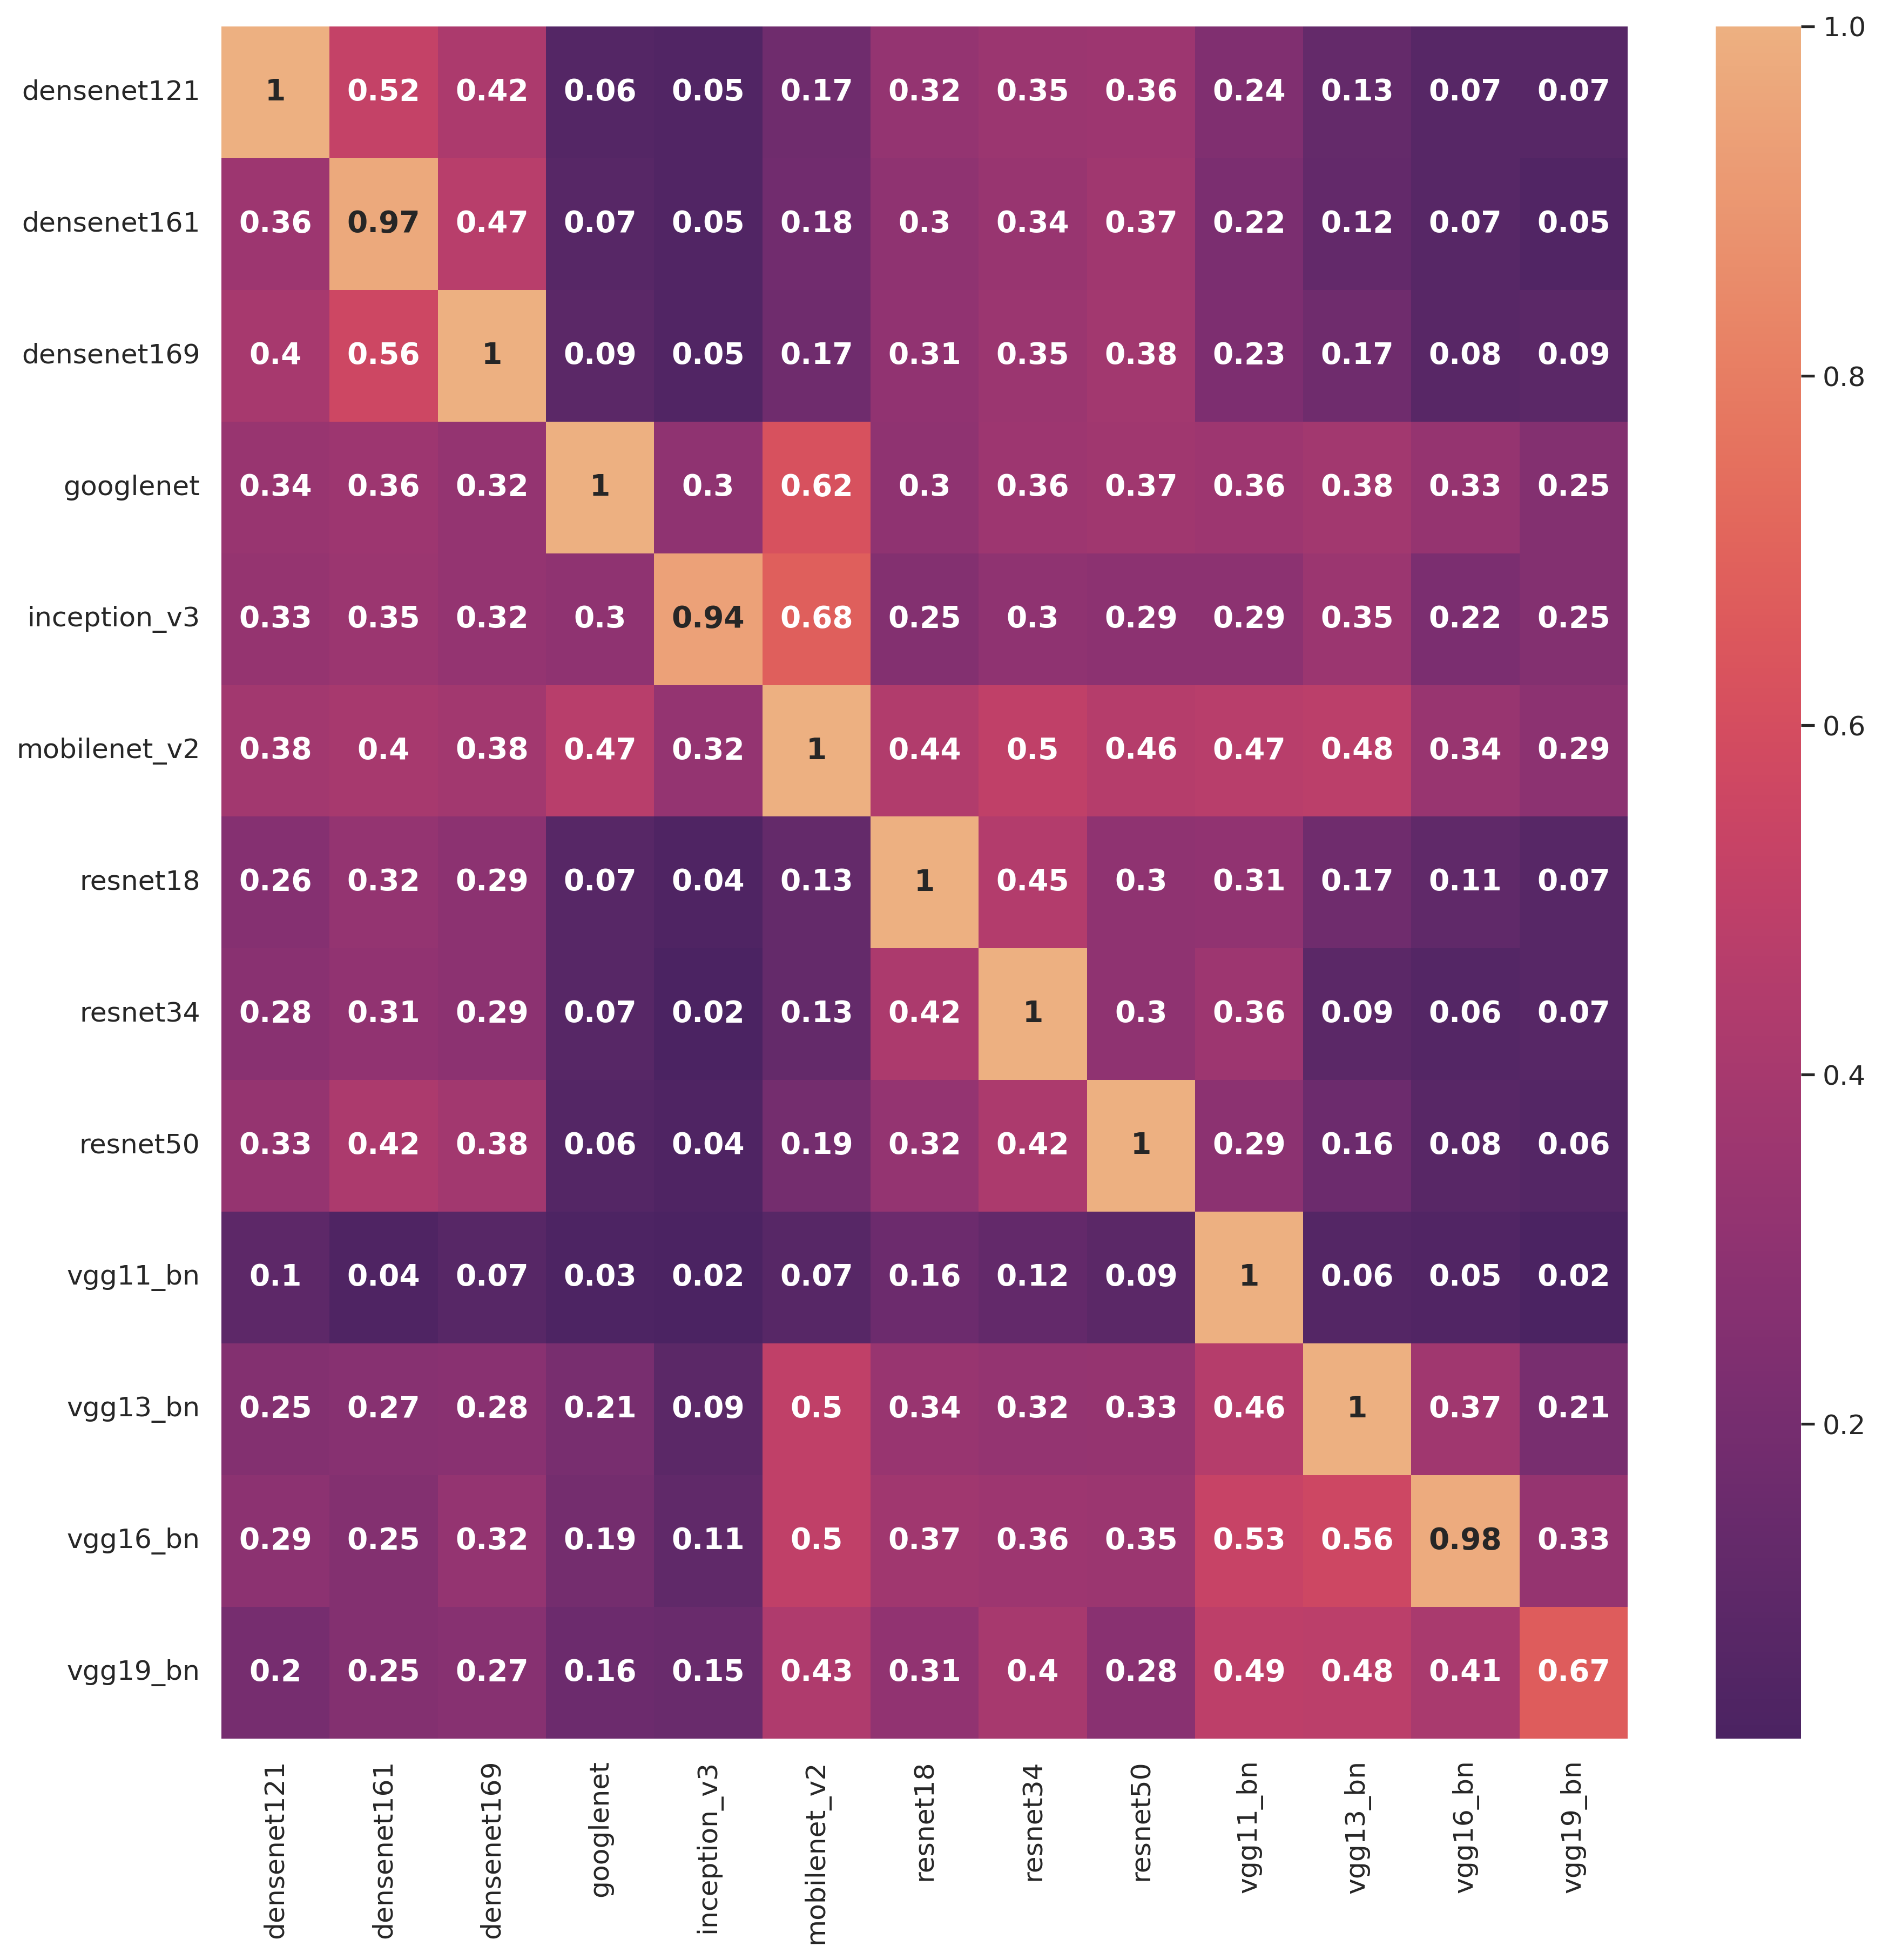

In [13]:
sns.set_style('whitegrid')
sns.set(font_scale=1.1) #
# sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
plt.figure(figsize=(14, 14), dpi=300)

sns.heatmap(
    data=heatmap_df.drop(columns=['Victim']), 
    yticklabels=heatmap_df['Victim'],
    annot=True,
    cmap='flare_r',
    annot_kws={"weight": "bold"},
)
plt.show()

### Correlations

In [14]:
transfer_res_eps03 = np.load(
    'results/transfer_eps_0.3_densenet121_densenet161_densenet169_googlenet_inception_v3_mobilenet_v2_resnet18_resnet34_resnet50_vgg11_bn_vgg13_bn_vgg16_bn_vgg19_bn.npy', 
    allow_pickle=True
).item()
transfer_res_eps0032 = np.load(
    'results/transfer_eps_0.032_densenet121_densenet161_densenet169_googlenet_inception_v3_mobilenet_v2_resnet18_resnet34_resnet50_vgg11_bn_vgg13_bn_vgg16_bn_vgg19_bn.npy',
    allow_pickle=True,
).item()


Victim model: densenet161



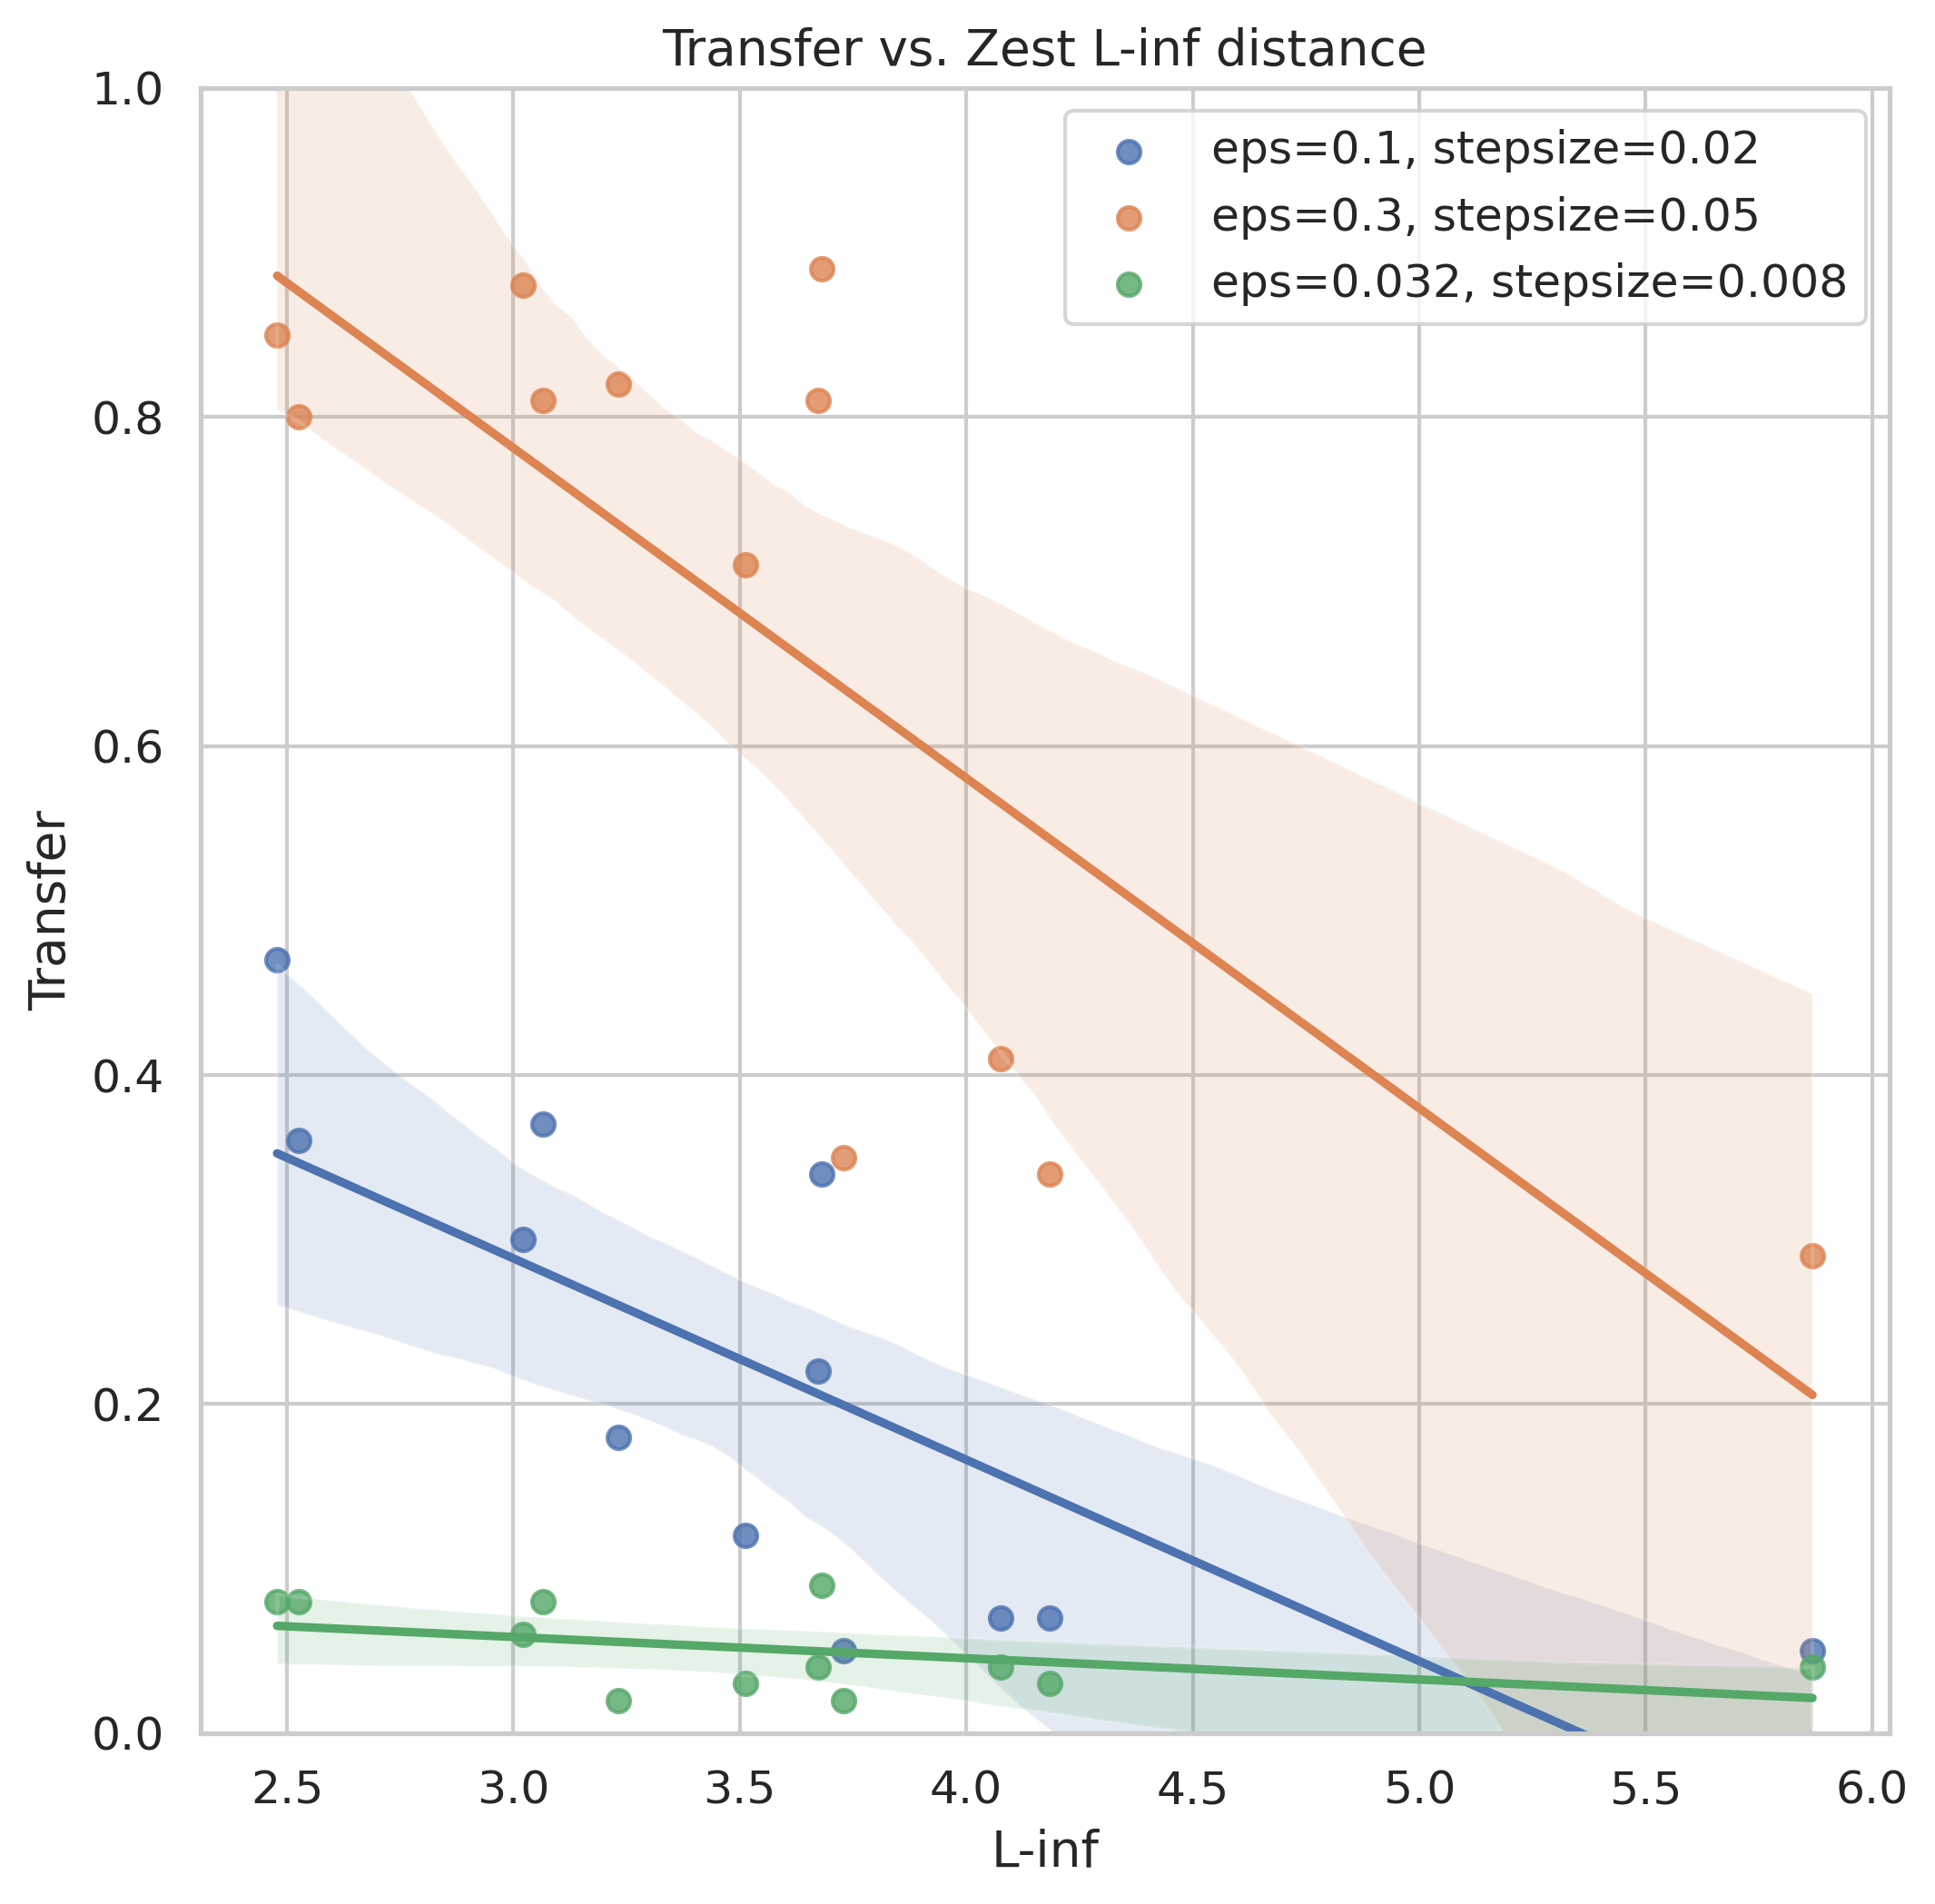

          Transfer     L-inf
Transfer  1.000000 -0.746482
L-inf    -0.746482  1.000000
--------------------------------------------------------------------------------


In [28]:
corrs = {}
for victim_model, cur_res in transfer_res.items():
    if victim_model != 'densenet161':
        continue

    cur_res_eps03 = transfer_res_eps03[victim_model]
    cur_res_eps0032 = transfer_res_eps0032[victim_model]

    print('\nVictim model: {}\n'.format(victim_model))
    res_df = pd.DataFrame.from_dict(cur_res).drop(columns=['preds']).rename(columns={'successes': 'Transfer'})
    res_df03 = pd.DataFrame.from_dict(cur_res_eps03).drop(columns=['preds']).rename(columns={'successes': 'Transfer'})
    res_df0032 = pd.DataFrame.from_dict(cur_res_eps0032).drop(columns=['preds']).rename(columns={'successes': 'Transfer'})

    dist = distance_dfs[N].filter(like=metric, axis=0).reset_index(level=0, drop=True).loc[victim_model].drop(labels=[victim_model])
    
    res = res_df.drop(labels=[victim_model])
    res03 = res_df03.drop(labels=[victim_model])
    res0032 = res_df0032.drop(labels=[victim_model])
    
    res[metric] = dist
    res03[metric] = dist
    res0032[metric] = dist

    sns.set_style('whitegrid')
    sns.set(font_scale=1.1)
    plt.figure(figsize=(8, 8), dpi=300)

    # Show regression plot
    sns.set_style('whitegrid')
    plt.ylim(0, 1)

    s = sns.regplot(data=res, y='Transfer', x=metric, truncate=True, label='eps=0.1, stepsize=0.02')
    sns.regplot(data=res03, y='Transfer', x=metric, truncate=True, ax=s, label='eps=0.3, stepsize=0.05')
    sns.regplot(data=res0032, y='Transfer', x=metric, truncate=True, ax=s, label='eps=0.032, stepsize=0.008')
    plt.legend()


    s.set(title='Transfer vs. Zest {} distance'.format(metric))
    plt.show()

    # Show correlation
    print(res.corr())
    corrs[victim_model] = res.corr().to_numpy()[0][1]
    print('-'*80)
    

In [10]:
corrs = {}
for victim_model, cur_res in transfer_res.items():
    corrs[victim_model] = {}
    for metric in metrics:
        res_df = pd.DataFrame.from_dict(cur_res).drop(columns=['preds']).rename(columns={'successes': 'Transfer'})
        dist = distance_dfs[N].filter(like=metric, axis=0).reset_index(level=0, drop=True).loc[victim_model].drop(labels=[victim_model])
        res = res_df.drop(labels=[victim_model])
        res[metric] = dist

        # Show correlation
        corrs[victim_model][metric] = res.corr().to_numpy()[0][1]

In [11]:
corrs_df = pd.DataFrame.from_dict(corrs, orient='index')
corrs_df.index.name = 'Model'
print(corrs_df.to_latex(
    float_format="%.3f",
    caption='Pearson correlation between transfer rate and Zest distance.',
    escape=False,
))

\begin{table}
\centering
\caption{Pearson correlation between transfer rate and Zest distance.}
\begin{tabular}{lrr}
\toprule
{} &  Cosine &  L-inf \\
Model        &         &        \\
\midrule
densenet121  &  -0.830 & -0.435 \\
densenet161  &  -0.871 & -0.746 \\
densenet169  &  -0.814 & -0.641 \\
googlenet    &  -0.440 & -0.499 \\
inception_v3 &  -0.632 & -0.218 \\
mobilenet_v2 &  -0.111 & -0.527 \\
resnet18     &  -0.765 & -0.703 \\
resnet34     &  -0.734 & -0.513 \\
resnet50     &  -0.743 & -0.483 \\
vgg11_bn     &   0.026 & -0.244 \\
vgg13_bn     &  -0.355 &  0.124 \\
vgg16_bn     &  -0.724 & -0.157 \\
vgg19_bn     &  -0.725 & -0.671 \\
\bottomrule
\end{tabular}
\end{table}

